In [1]:
import pandas as pd

gold_prices = pd.read_csv("data/gold-daily-cleaned.csv")
crude_oil_prices = pd.read_csv("data/crude-oil-daily-cleaned.csv")
silver_prices = pd.read_csv("data/silver-daily-cleaned.csv")
xau = pd.read_csv("data/^XAU.csv")
newmont = pd.read_csv("data/newmont-stock-daily-cleaned.csv")

"""Remaining datasets: HUI, FED_FUNDS, ABX/BARRICK_GOLD, PLATINUM, S&P, FTSE, LIBOR, VOLUMNE DATA"""

'Remaining datasets: HUI, FED_FUNDS, ABX/BARRICK_GOLD, PLATINUM, S&P, FTSE, LIBOR, VOLUMNE DATA'

In [2]:
joinedDF = (gold_prices.set_index('date').join(crude_oil_prices.set_index('date'))).join(silver_prices.set_index('date')).join(xau.set_index('date')).join(newmont.set_index('date'), lsuffix='_xau', rsuffix='_newmont')
joinedDF.head()

goldPrice   oilPrice   silverPrice    Open_xau    High_xau  \
date                                                                      
2010-01-21     1104.00      75.84         17.68  166.860001  166.860001   
2010-01-22     1096.50      74.25         17.28  158.160004  162.929993   
2010-01-25     1103.50      74.90         17.16  159.309998  160.729996   
2010-01-26     1090.75      74.67         16.79  156.639999  159.119995   
2010-01-27     1094.75      73.64         16.74  155.720001  156.789993   

               Low_xau   Close_xau  Adj Close_xau  Volume_xau  Open_newmont  \
date                                                                          
2010-01-21  159.410004  159.490005     159.490005         0.0     46.040001   
2010-01-22  156.029999  158.779999     158.779999         0.0     44.060001   
2010-01-25  157.149994  157.240005     157.240005         0.0     45.060001   
2010-01-26  154.699997  156.080002     156.080002         0.0     43.709999   
2010-01-27  151.710007  154.729996     154.729996         0.0     44.250000   

            High_newmont  Low_newmont  Close_newmont  Adj Close_newmont  \
date                                                                      
2010-01-21     46.200001    44.349998      44.439999          37.254463   
2010-01-22     45.689999    43.860001      44.430000          37.246090   
2010-01-25     45.060001    44.020000      44.130001          36.994606   
2010-01-26     45.040001    43.619999      44.240002          37.086800   
2010-01-27     44.549999    43.410000      44.189999          37.044880   

            Volume_newmont  
date                        
2010-01-21      15469500.0  
2010-01-22      13058700.0  
2010-01-25       8405600.0  
2010-01-26       8376100.0  
2010-01-27       8942000.0

In [3]:
joinedDF[pd.isnull(joinedDF).any(axis=1)]

goldPrice   oilPrice   silverPrice  Open_xau  High_xau  Low_xau  \
date                                                                           
2010-02-15     1099.50        NaN        15.570       NaN       NaN      NaN   
2010-07-05     1208.50        NaN        17.850       NaN       NaN      NaN   
2010-09-06     1249.50        NaN        19.860       NaN       NaN      NaN   
2010-11-25     1370.50        NaN        27.440       NaN       NaN      NaN   
2010-12-24     1380.50        NaN        29.070       NaN       NaN      NaN   
...                ...        ...           ...       ...       ...      ...   
2019-02-18     1323.95        NaN           NaN       NaN       NaN      NaN   
2019-07-04     1415.25        NaN           NaN       NaN       NaN      NaN   
2019-09-02     1523.35        NaN           NaN       NaN       NaN      NaN   
2019-11-27     1459.80      58.11        16.942       NaN       NaN      NaN   
2019-11-28     1457.55        NaN           NaN       NaN       NaN      NaN   

            Close_xau  Adj Close_xau  Volume_xau  Open_newmont  High_newmont  \
date                                                                           
2010-02-15        NaN            NaN         NaN           NaN           NaN   
2010-07-05        NaN            NaN         NaN           NaN           NaN   
2010-09-06        NaN            NaN         NaN           NaN           NaN   
2010-11-25        NaN            NaN         NaN           NaN           NaN   
2010-12-24        NaN            NaN         NaN           NaN           NaN   
...               ...            ...         ...           ...           ...   
2019-02-18        NaN            NaN         NaN           NaN           NaN   
2019-07-04        NaN            NaN         NaN           NaN           NaN   
2019-09-02        NaN            NaN         NaN           NaN           NaN   
2019-11-27        NaN            NaN         NaN     37.830002     38.380001   
2019-11-28        NaN            NaN         NaN           NaN           NaN   

            Low_newmont  Close_newmont  Adj Close_newmont  Volume_newmont  
date                                                                       
2010-02-15          NaN            NaN                NaN             NaN  
2010-07-05          NaN            NaN                NaN             NaN  
2010-09-06          NaN            NaN                NaN             NaN  
2010-11-25          NaN            NaN                NaN             NaN  
2010-12-24          NaN            NaN                NaN             NaN  
...                 ...            ...                ...             ...  
2019-02-18          NaN            NaN                NaN             NaN  
2019-07-04          NaN            NaN                NaN             NaN  
2019-09-02          NaN            NaN                NaN             NaN  
2019-11-27    37.830002          38.18          38.044266       3772300.0  
2019-11-28          NaN            NaN                NaN             NaN  

[61 rows x 15 columns]

In [4]:
filteredDF = joinedDF.dropna(how='any',axis=0).drop(columns=['Open_xau','High_xau','Low_xau','Close_xau','Volume_xau','Open_newmont','High_newmont','Low_newmont','Close_newmont'])
len(joinedDF), len(filteredDF), filteredDF.head()

(2539, 2478,              goldPrice   oilPrice   silverPrice  Adj Close_xau  \
 date                                                             
 2010-01-21     1104.00      75.84         17.68     159.490005   
 2010-01-22     1096.50      74.25         17.28     158.779999   
 2010-01-25     1103.50      74.90         17.16     157.240005   
 2010-01-26     1090.75      74.67         16.79     156.080002   
 2010-01-27     1094.75      73.64         16.74     154.729996   
 
             Adj Close_newmont  Volume_newmont  
 date                                           
 2010-01-21          37.254463      15469500.0  
 2010-01-22          37.246090      13058700.0  
 2010-01-25          36.994606       8405600.0  
 2010-01-26          37.086800       8376100.0  
 2010-01-27          37.044880       8942000.0  )

In [5]:
import sklearn.preprocessing
normalizedDF = sklearn.preprocessing.normalize(filteredDF, axis=0, norm='max')
import numpy as np
np.size(normalizedDF, 1), np.size(normalizedDF, 0)

(6, 2478)

In [6]:
import sklearn.model_selection
print(normalizedDF[:5,:])

[[0.58381809 0.67485318 0.36303901 0.69661501 0.60389085 0.18741164]
 [0.57985193 0.66070475 0.35482546 0.69351387 0.60375512 0.15820501]
 [0.58355368 0.6664887  0.3523614  0.68678754 0.59967859 0.10183311]
 [0.57681121 0.66444207 0.34476386 0.68172092 0.60117305 0.10147572]
 [0.57892649 0.65527674 0.34373717 0.67582441 0.60049353 0.10833155]]


In [7]:
train, test = sklearn.model_selection.train_test_split(normalizedDF, train_size=0.80)
print(train[:5,:])

[[0.71311475 0.73126891 0.47864476 0.89512996 0.85511914 0.0753911 ]
 [0.66292967 0.44785549 0.34488706 0.37195897 0.51040478 0.06108218]
 [0.66274458 0.68321765 0.41704312 0.83293295 0.8593578  0.14656258]
 [0.87533051 0.80895177 0.61088296 0.70845162 0.65162947 0.07366109]
 [0.67781597 0.83466809 0.4238193  0.40449881 0.41001789 0.07338245]]


In [8]:
train_source = train[:,1:]
train_target = train[:,:1]
"""More plots of the collected graphs"""
print(train_source.shape, train_target.shape)

(1982, 5) (1982, 1)


In [9]:
"Linear regression"
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True).fit(train_source, train_target)
reg.score(train_source,train_target)

0.8432141643390594

In [10]:
test_source = test[:,1:]
test_target = test[:,:1]
prediction = reg.predict(test_source)

v_score = sklearn.metrics.explained_variance_score(test_target, prediction)
print(v_score)
r2_score = sklearn.metrics.r2_score(prediction, test_target)
print(r2_score)

0.8384735956423378
0.807009051865919


In [11]:
"""LIME"""
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(train_source, feature_names=['oilPrice', 'silverPrice', 'XAU','Newmont','NewmontVolume'], class_names=['goldPrice'], mode='regression')

"Run explainer on one test prediction"
i1 = np.random.randint(0, test.shape[0])
exp1 = explainer.explain_instance(test_source[i1], reg.predict)
exp1.show_in_notebook(show_table=True)

In [12]:
test_target[i1]

array([0.89978847])

In [13]:
prediction[i1]

array([0.88989874])

In [14]:
"""LIME"""
explainer_continuous = lime.lime_tabular.LimeTabularExplainer(train_source, feature_names=['oilPrice', 'silverPrice', 'XAU','Newmont','NewmontVolume'], class_names=['goldPrice'], mode='regression', discretize_continuous=False)
"Run explainer on one test prediction"
i2 = np.random.randint(0, test.shape[0])
exp2 = explainer_continuous.explain_instance(test_source[i1], reg.predict)
exp2.show_in_notebook(show_table=True)

In [15]:
"""Submodular Pick"""
from lime import submodular_pick
sp_obj = submodular_pick.SubmodularPick(explainer, train_source, reg.predict, sample_size=100, num_exps_desired=3)
[reps.as_pyplot_figure() for reps in sp_obj.sp_explanations];

(1982, 5)


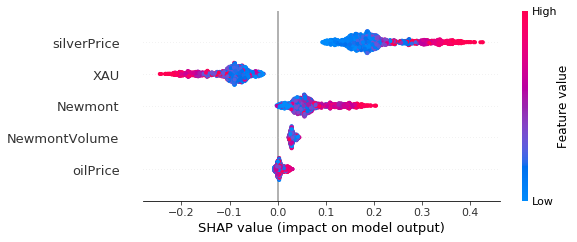

In [16]:
"""SHAP"""
import shap
shap.initjs()
shap_explainer = shap.LinearExplainer(reg, train_source, feature_perturbation="interventional")
"how about correlation dependent"
shap_values = shap_explainer.shap_values(train_target)
print(shap_values.shape)
shap.summary_plot(shap_values, train_source, feature_names=['oilPrice', 'silverPrice', 'XAU','Newmont','NewmontVolume'])

In [17]:
i3 = np.random.randint(0, shap_values.shape[0])
fe=['oilPrice', 'silverPrice', 'XAU','Newmont','NewmontVolume']
shap.force_plot(
        shap_explainer.expected_value, shap_values[i3,:], features=train_source[i3,:], feature_names=fe
        )

In [18]:
i4 = np.random.randint(0, shap_values.shape[0])
fe=['oilPrice', 'silverPrice', 'XAU','Newmont','NewmontVolume']
shap.force_plot(
        shap_explainer.expected_value, shap_values[i4,:], features=train_source[i4,:], feature_names=fe
        )

In [19]:
shap.force_plot(shap_explainer.expected_value, shap_values, train_source, feature_names=fe)